In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
#df.head()

In [4]:
#df.info()

In [5]:
#df["vol"] = df["vol"].str.replace(',', '').astype(float)

In [6]:
#df.describe()

In [7]:
from stockstats import StockDataFrame as Sdf

In [8]:
stock_df = Sdf.retype(df)

In [9]:
df['RSI'] = stock_df['rsi_14']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
del df['close_-1_s']
del df['close_-1_d']
del df['rs_14']
del df['rsi_14']
del df['closepm']
del df['closenm']
del df['closepm_14_smma']
del df['closenm_14_smma']





In [11]:
df['MACD'] = stock_df['macd']
df['TRIX'] = stock_df['close_3_trix']

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


In [12]:
df['EMA'] = df.iloc[:,0].ewm(span=40,adjust=False).mean()

In [13]:
#df['SO']= (df['close']-df['low'])/(df['high']-df['low'])

In [14]:

#df['Class'] = np.where((df['close'] - df['open']) > 0, 'UP', 'DOWN')

In [15]:
#df.head()

In [16]:
import ta
#df['SO'] = ta.momentum.StochasticOscillator(df['high'],df['low'],df['close'])
#df['SO'].astype(float)

In [17]:
df['BB'] = stock_df['boll']
df['CCI'] = stock_df['cci']

In [18]:
#df.head()

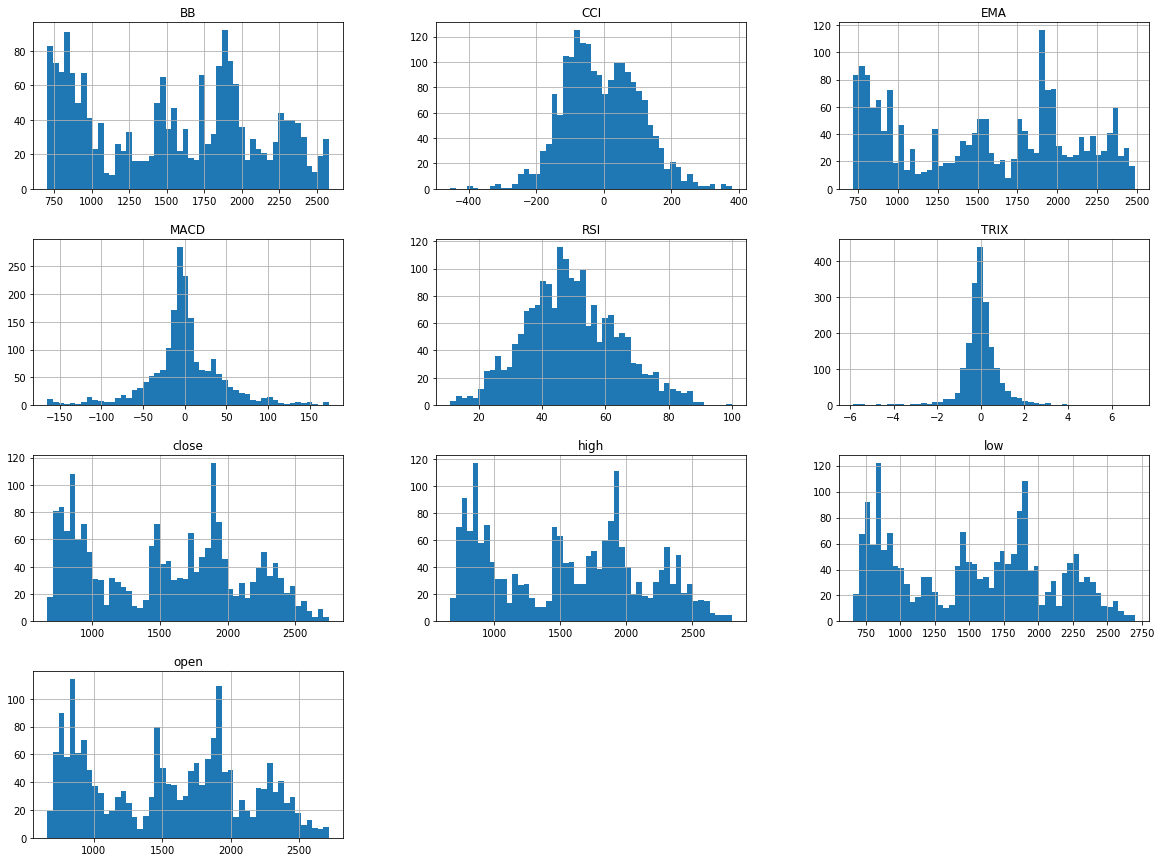

In [19]:
df.hist(bins = 50, figsize =(20,15))   #shows histogram
plt.show()

In [20]:
#from pandas.plotting import scatter_matrix
#attributes = ["BB","CCI","EMA","MACD","RSI",'TRIX']
#scatter_matrix(df[attributes], figsize=(12,8))

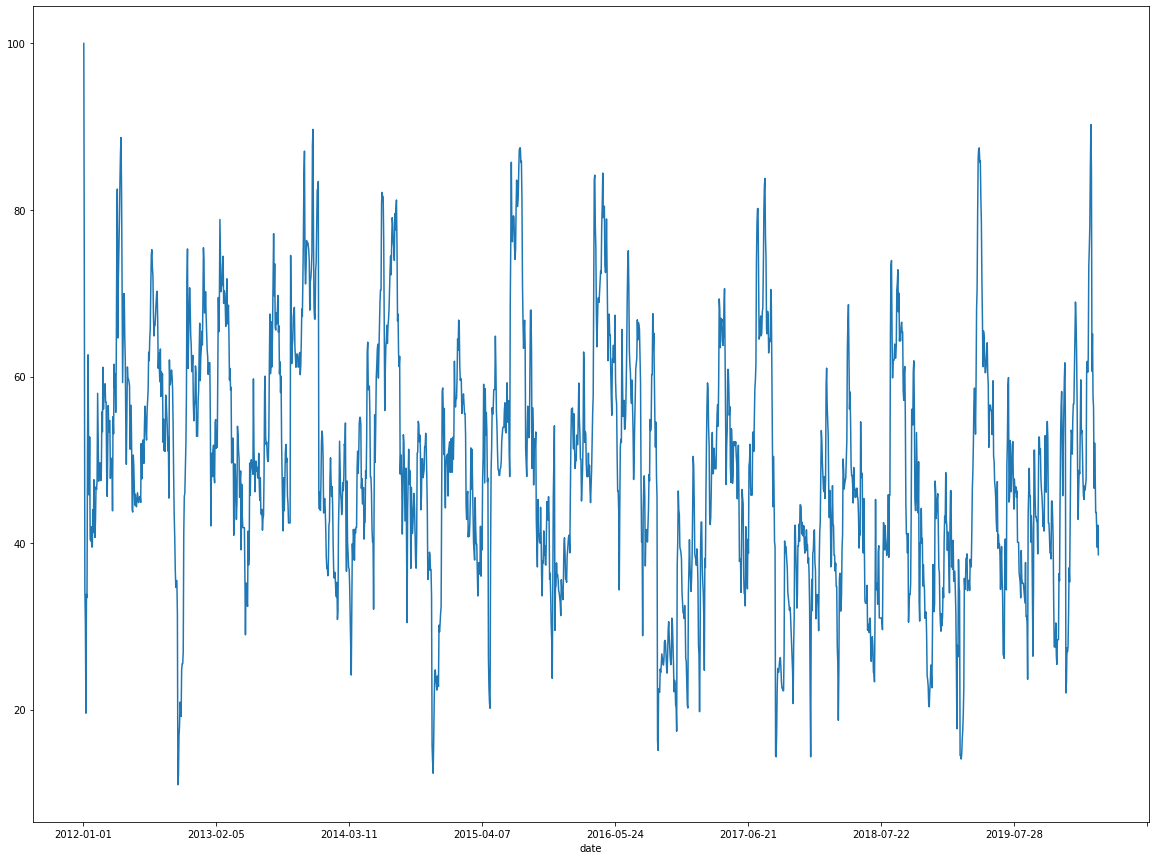

In [21]:
df['RSI'].plot(figsize =(20,15))

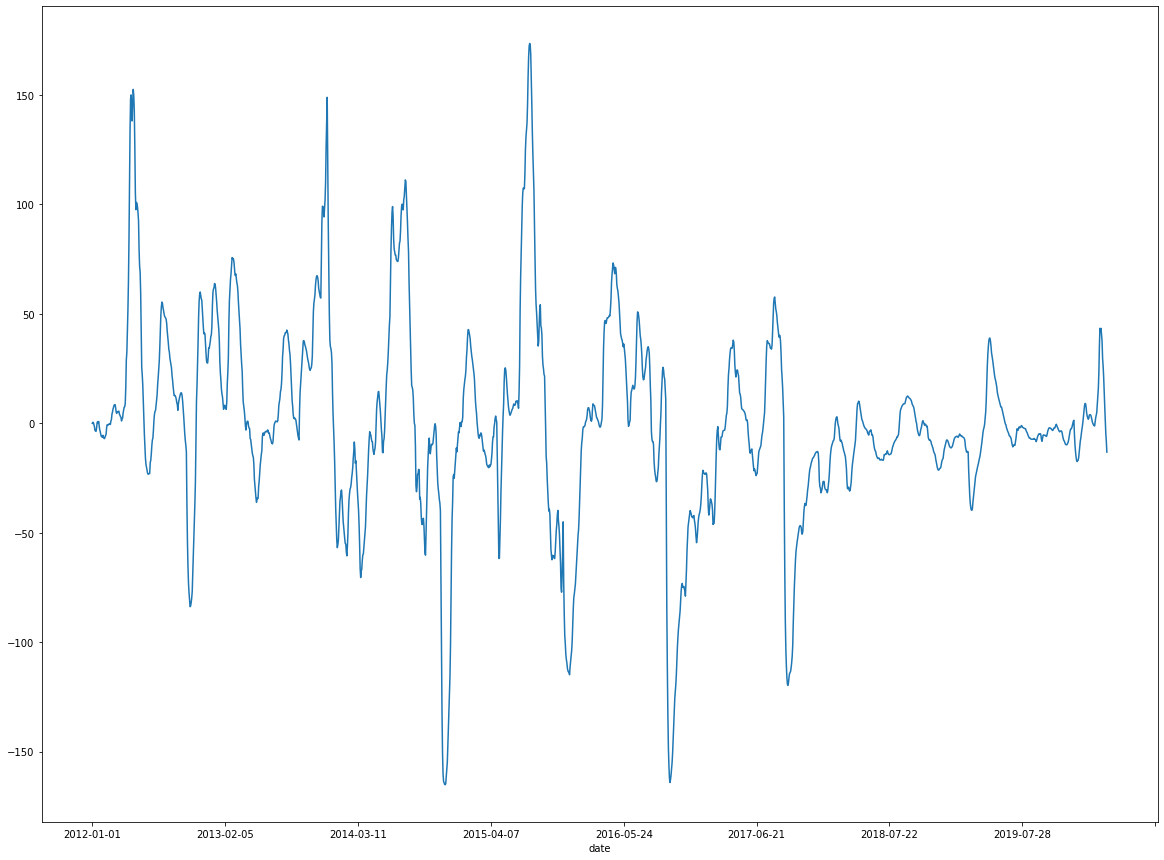

In [22]:
df['MACD'].plot(figsize =(20,15))

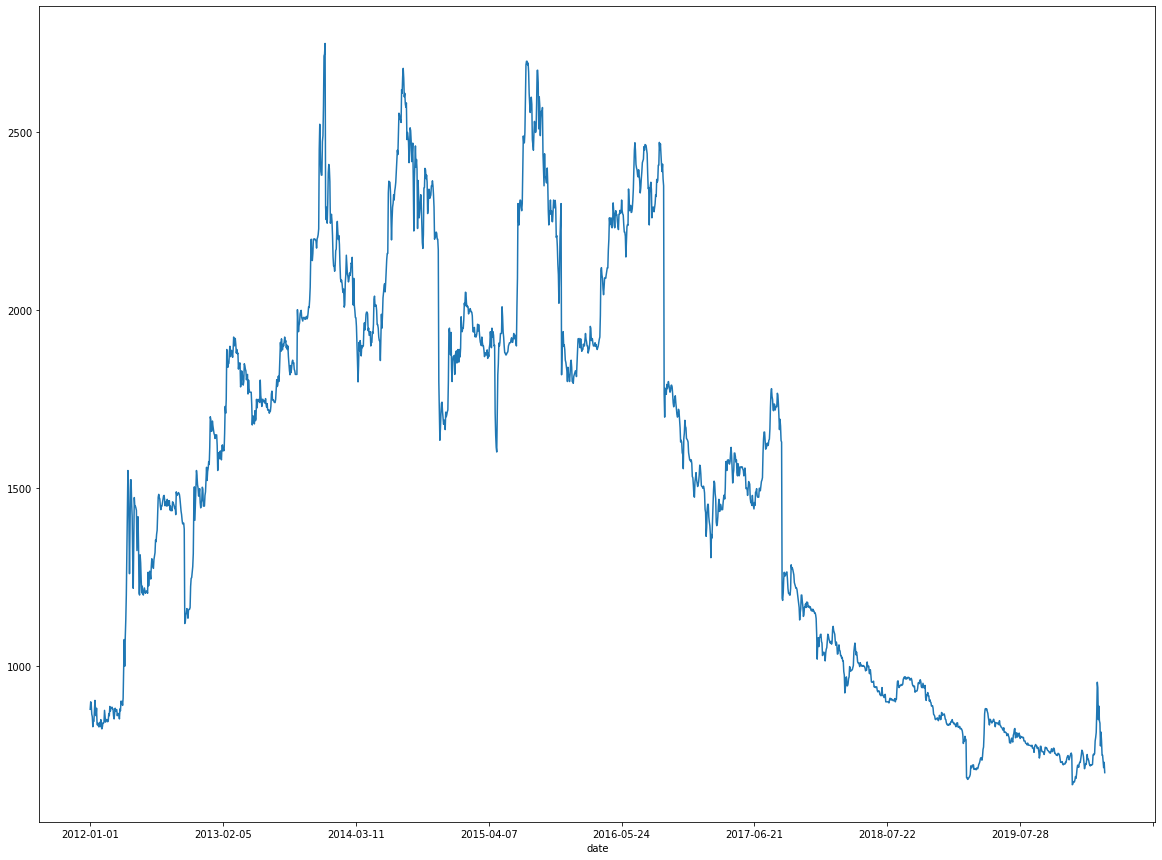

In [23]:
df['close'].plot(figsize =(20,15))

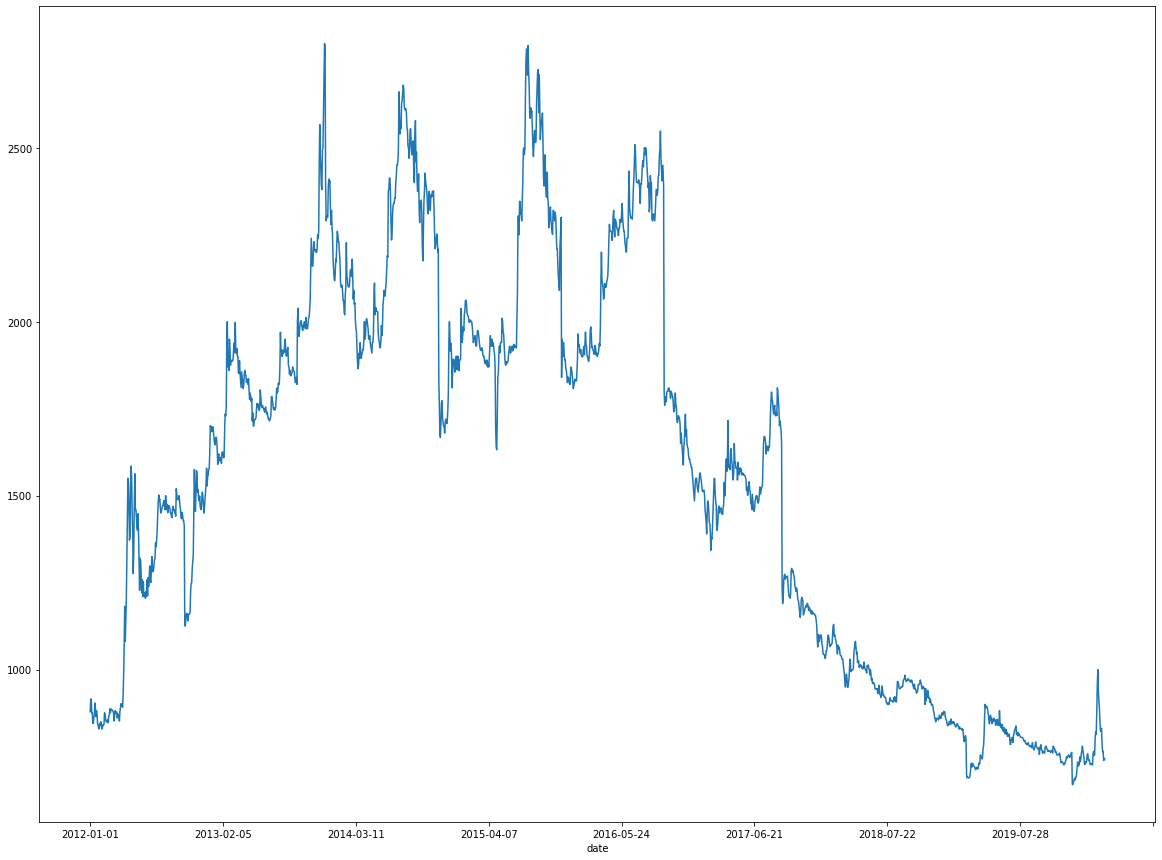

In [24]:
df['high'].plot(figsize =(20,15))

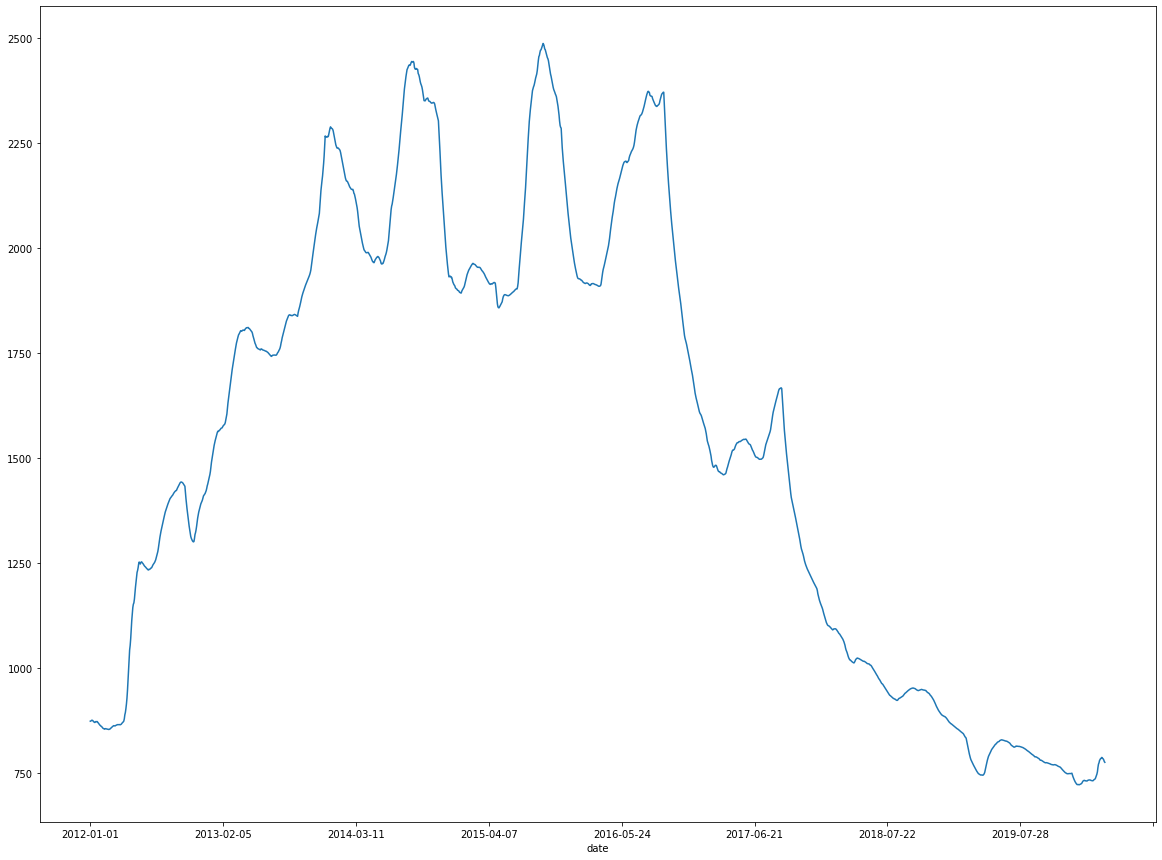

In [25]:
df['EMA'].plot(figsize =(20,15))

In [26]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [27]:
dataset = df.sort_index(ascending=True, axis=0)

In [28]:
dataset["vol"] = dataset["vol"].str.replace(',', '').astype(float)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1910 entries, 2012-01-01 to 2020-03-22
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1910 non-null   float64
 1   high    1910 non-null   float64
 2   low     1910 non-null   float64
 3   close   1910 non-null   float64
 4   vol     1910 non-null   float64
 5   RSI     1909 non-null   float64
 6   MACD    1910 non-null   float64
 7   TRIX    1909 non-null   float64
 8   EMA     1910 non-null   float64
 9   BB      1910 non-null   float64
 10  CCI     1909 non-null   float64
dtypes: float64(11)
memory usage: 179.1+ KB


In [30]:
dataset.rolling(7).mean().head(20) #7 day rolling

,open,high,low,close,vol,RSI,MACD,TRIX,EMA,BB,CCI
date,,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,871.000000,878.428571,852.714286,867.142857,1442.142857,NaN,-1.146226,NaN,873.904825,879.920408,NaN
2012-01-10,868.857143,876.000000,851.857143,862.285714,1422.000000,46.054332,-1.668304,-0.369035,873.658596,877.831122,-42.403280
2012-01-11,864.000000,870.428571,846.571429,858.571429,1417.285714,39.109071,-2.062573,-0.480565,873.187445,874.394615,-51.843097


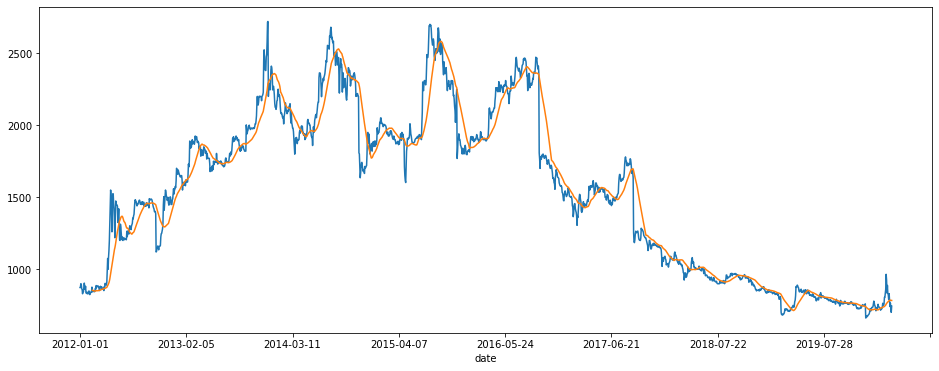

In [36]:
dataset['open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['open'].plot()

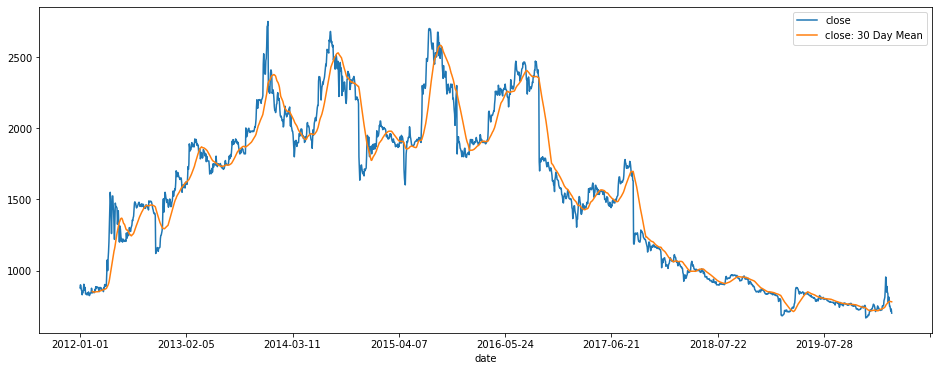

In [37]:
dataset['close: 30 Day Mean'] = dataset['close'].rolling(window=30).mean()
dataset[['close','close: 30 Day Mean']].plot(figsize=(16,6))

In [47]:
dataset['open30'] = dataset.rolling(window=30).mean()['open']
dataset['close: 30 Day Mean'] = dataset['close'].rolling(window=30).mean()
